# Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

# 1. Import modules and the data

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [123]:
data = pd.read_csv("C:\\Users\\User\\OneDrive\\Documents\\Faiz Khan Program\\Machine Learning\\ML with codebasics\\HR_comma_sep.csv")

# 2. Exploratory Data Analysis 

In [124]:
data.shape

(14999, 10)

In [125]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Info and Describe

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [127]:
data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Checking if there is any null values

In [128]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check unique values of Department and Salary

In [129]:
pd.unique(data['Department'])

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [130]:
pd.unique(data['salary'])

array(['low', 'medium', 'high'], dtype=object)

### Histogram to check distribution of datas for each columns

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>, <Axes: >]],
      dtype=object)

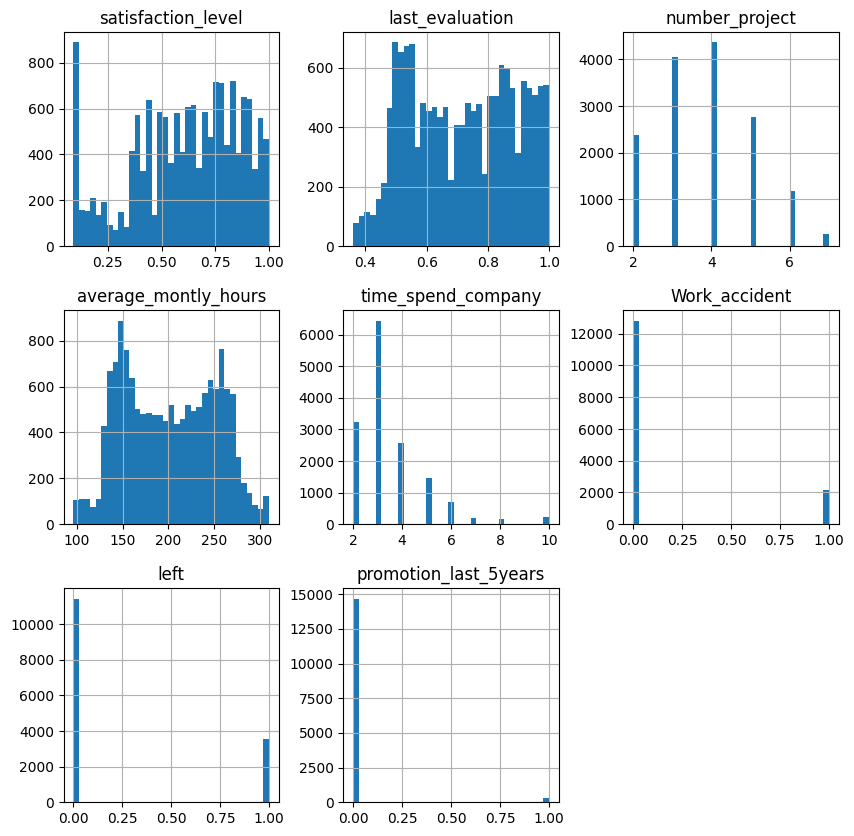

In [131]:
data.hist(bins=35, figsize=(10, 10))

### Check how many employees has left and how many retained

In [132]:
data[data['left'] == 1].shape

(3571, 10)

In [133]:
data[data['left'] == 0].shape

(11428, 10)

### Check Average of each column FOR the "left" column

Dropping Department and salary column cuz they are in strings

In [134]:
data.drop(['Department', 'salary'], axis=1).groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

From checking the Average for each columns grouped by **left**, we can get these conclusions:

1. Employees who left has low Satifaction level(0.44) on average
2. There is no much changes in last_evaluatioon, number_project for those who left or stayed so we can say it doesn't really impact
3. Employees who left work more on Average monthly hours(207 hours) 
4. time_spend_company, work_accident also doesnt have much differences between tho who left or stayed so its not important
5. Employees who left didn't get promotion much from last 5 years, so Employees who are given promotion are most likely to stay

# 3. Plot bar charts showing impact of employee salaries on retention
Num of Employee leaving or staying based on salary column

In [135]:
pd.crosstab(data.salary, data.left)

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317

Plotting above data in bar chart

<Axes: xlabel='salary'>

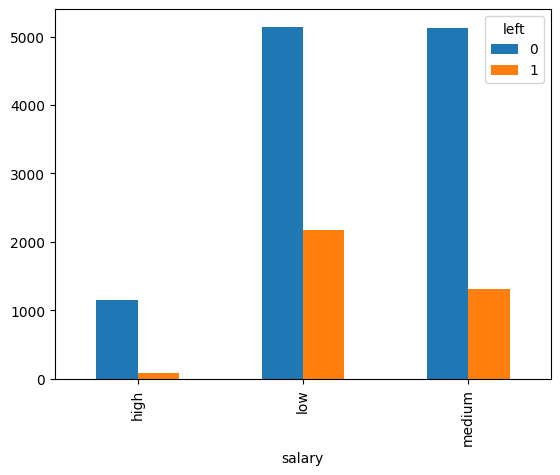

In [136]:
pd.crosstab(data.salary, data.left).plot(kind='bar')

From Above bar chart, we can conclude that Employees who left mostly have low to medium salary.

So Employees who have high salary are likely to not leave the Company

### Pie chart of Salary for Employees who left

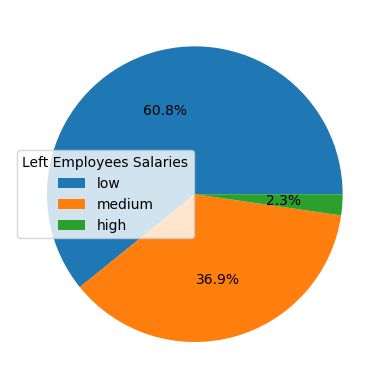

In [137]:
high = (data[(data['left'] == 1) & (data['salary'] == 'high')].shape[0] / data[data['left']==1].shape[0])*100
medium = (data[(data['left'] == 1) & (data['salary'] == 'medium')].shape[0]/ data[data['left']==1].shape[0])*100
low = (data[(data['left'] == 1) & (data['salary'] == 'low')].shape[0] / data[data['left']==1].shape[0])*100

plt.pie([low, medium, high], autopct='%1.1f%%')
plt.legend(labels=[i for i in pd.unique(data['salary'])], title="Left Employees Salaries")

Above we can see that:

1. 60& of the employees who left have low salary
2. 36% have medium
3. and only 2% had high salaries

meaning 97% of the Employees who left has low to medium salaries so we can say Salary column play a major role in Employee retention

# 4. Plot bar charts showing corelation between department and employee retention
Check which Department have more num of Employee retention

<Axes: xlabel='Department'>

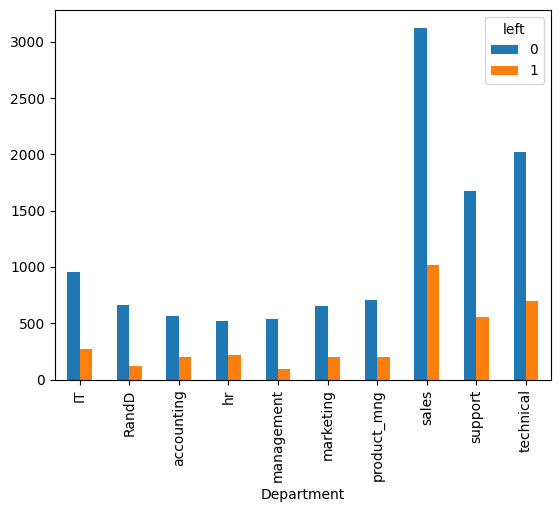

In [138]:
pd.crosstab(data.Department, data.left).plot(kind="bar")

We can see above, there are some impact but its not major so we can ignore the Department column

# From the data analysis so far we can conclude that we will use following variables as independant variables in our model

1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**


# 5. One Hot Encoding

Salary column is all categorical so we can do One Hot Encoding or dummy variable of pandas, i will use SKLearn OneHotEncoding

In [139]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[['salary']])
encoded_data

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [142]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['salary'])).astype(int)
encoded_df.shape

(14999, 3)

In [144]:
# merged_data = pd.concat([data, encoded_df], axis=1)
merged_data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  salary_high  salary_low  salary_medium  
0     low            0           1              0  
1  medium            0           0              1  
2  medium            0           0              1  
3     low            0           1              0  
4     low            0           1              0

### Drop All Unnecessary columns

In [189]:
# merged_data.drop(['last_evaluation', 'number_project', 'time_spend_company',
#                   'Work_accident', 'left', 'salary', 
#                   'Department', 'salary_medium'], axis=1, inplace=True)

In [190]:
merged_data.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  
0            0           1  
1            0           0  
2            0           0  
3            0           1  
4            0           1

# 6. Data Splitting and Model Training

In [191]:
X = merged_data
y = data.left

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [193]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predictions

In [194]:
predict = model.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [195]:
result = {
    "Actual value" : y_test,
    "Predicted value" : predict
}
result_df = pd.DataFrame(result)
result_df.head()

Actual value  Predicted value
5946              0                0
14207             0                0
10290             0                0
1665              1                1
13101             0                0

In [197]:
print(f"Num of wrong predictions : {np.sum(y_test != predict)}")

Num of wrong predictions : 686


# 7. Measuring the Accuracy of the model

In [198]:
model.score(X_test, y_test)

0.7713333333333333

# 8. Manually Predicting a single data

In [241]:
model.predict([[0.50, 200, 0, 1, 0]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Now lets do the same prediction above but manually

In [253]:
m1 = model.coef_.flatten()[0]
m2 = model.coef_.flatten()[1]
m3 = model.coef_.flatten()[2]
m4 = model.coef_.flatten()[3]
m5 = model.coef_.flatten()[4]
b = model.intercept_

In [254]:
z = m1 * 0.50 + m2 * 200 + m3 * 0 + m4 * 1 + m5 * 0 + b

In [255]:
e = 2.71828
np.divide(1, 1 + (1/np.power(e, z)))

array([0.0694325])

As you can see below, the above result is correct!

In [257]:
model.predict_proba([[0.50, 200, 0, 1, 0]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.93056761, 0.06943239]])